<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%5BML_2%5DClassification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 불러오기

In [ ]:
from sklearn import datasets 
import numpy as np

iris = datasets.load_iris()
X= iris.data[:,[2,3]]
y = iris.target
print(np.unique(y)) #y에 저장된 3 개의 고유한 class label을 반환, 꽃 3종류를 가져옴

[0 1 2]


# 데이터 셋을 train 용과 test용으로 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state = 1, stratify = y) #stratify 는 계층화 기능, data set들의  label비율을 동일하게 해줌

In [ ]:
print(np.bincount(y)) #label을 확인
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


# feature 표준화 해주기

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #sklearn 클래스
sc.fit(X_train) #샘플 평균과 표준편차 계산 메서드
X_train_std = sc.transform(X_train) #계산된 샘플평균과 표준편차를 사용하여 표준화를 시키는 메서드
X_test_std = sc.transform(X_test)

# Perceptron에 학습



In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.01,random_state = 1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.01, random_state=1)

In [ ]:
y_pre = ppn.predict(X_test_std)
print((y_test != y_pre).sum())

2


In [ ]:
from sklearn.metrics import accuracy_score #정확도 확인
print('%.3f.' % accuracy_score(y_test,y_pre))


0.956.


In [ ]:
print(ppn.score(X_test_std,y_test))

0.9555555555555556


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')
  
  if test_idx:
    # 모든 샘플 그리기
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0],X_test[:, 1],facecolor='none',edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100, label='test set')

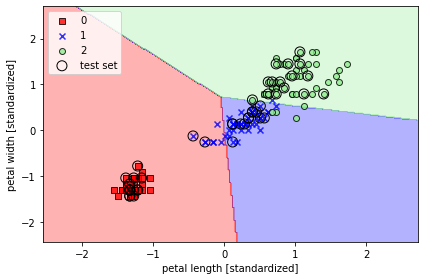

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()